In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as dias

In [25]:
data_elipse = pd.read_csv('polarizedElipse.csv', delimiter = '\t')
data_linear = pd.read_csv('polarizedLinear.csv', delimiter = '\t')
data_elipse

,angle,V,beta,alpha
0,-37,1.30,25.0,53.4
1,-27,1.70,NaN,NaN
2,-20,2.14,NaN,NaN
3,-10,2.67,NaN,NaN
4,0,3.26,NaN,NaN
5,10,3.74,NaN,NaN
6,20,4.14,NaN,NaN
7,30,4.24,NaN,NaN
8,40,4.10,NaN,NaN
9,50,3.80,NaN,NaN


In [6]:
'''
1- corresponde a linear
2- corresponde a eliptíco
'''

angle1 = (np.array(data_linear['angle'], float) - data_linear['ref'][0]) *np.pi/180
v1 = np.array(data_linear['V'], float)

angle2 = (np.array(data_elipse['angle'], float) - data_linear['ref'][0])*np.pi/180
v2 = np.array(data_elipse['V'], float)

In [55]:
def linreg(x, m, b):
    return m*x + b

def r2(y, ymodel):
    yMean = np.mean(y)
    SSres = np.sum( (y - ymodel)**2 )
    SStot = np.sum( (y - yMean)**2 )
    return 1 - SSres/SStot

def T(x, v, b):
    return v*(np.cos(x)**2 + np.cos(2*b - x)**2)

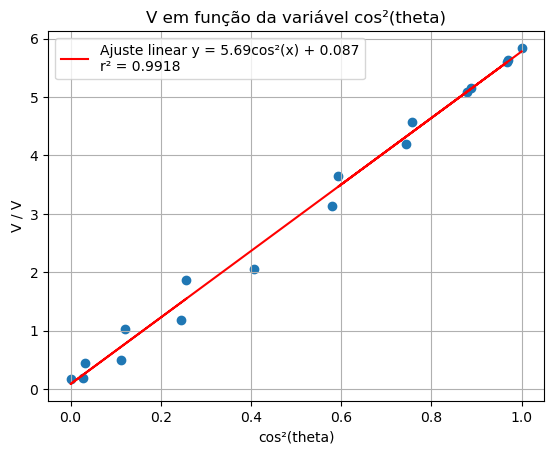

[5.69255626 0.0868976 ] 0.9918487240898828
0.3997357723244328 0.24848575124724182


In [53]:
#plt.scatter(angle1, v1)
cos_angle1 = np.cos(angle1)**2
params1, covari1 = dias(linreg, cos_angle1, v1)
r21 = r2(v1, linreg(cos_angle1, params1[0], params1[1]))

plt.scatter(cos_angle1, v1)
plt.plot(cos_angle1, linreg(cos_angle1, params1[0], params1[1]), color = "r", 
         label = f"Ajuste linear y = {params1[0]:.2f}cos²(x) + {params1[1]:.3f}\nr² = {r21:.4f}")
plt.title("V em função da variável cos²(theta)")
plt.ylabel("V / V")
plt.xlabel("cos²(theta)")
plt.legend()
plt.grid()
plt.show()
print(params1, r21)
print(np.sqrt(covari1[0,0])*3,np.sqrt(covari1[1,1])*3)

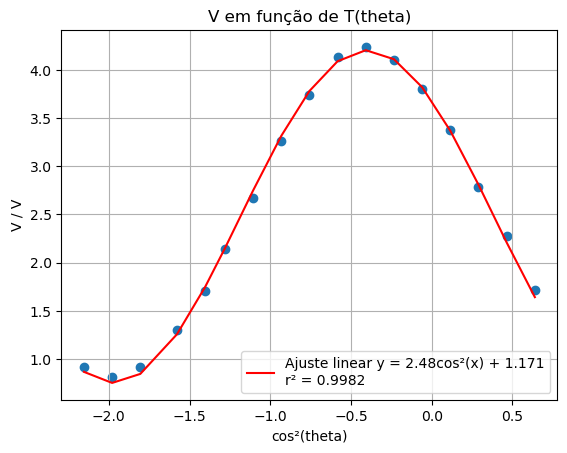

[2.47792242 1.17136312] 0.9982371726709877
0.03528407220226536 0.011241167247183503
67.11416283031159


In [88]:
beta = params2[1]
#transformação necessaria para os dados de angle2
angle2_T = (np.cos(angle2)**2 + np.cos(2*beta - angle2))**2

params2, covari2 = dias(T, angle2, v2)
r22 = r2(v2, T(angle2, params2[0], params2[1]))

plt.scatter(angle2, v2)
plt.plot(np.sort(angle2), T(np.sort(angle2), params2[0], params2[1]), color = "r", 
         label = f"Ajuste linear y = {params2[0]:.2f}cos²(x) + {params2[1]:.3f}\nr² = {r22:.4f}")
plt.title("V em função de T(theta)")
plt.ylabel("V / V")
plt.xlabel("cos²(theta)")
plt.legend()
plt.grid()
plt.show()
print(params2, r22)
print(np.sqrt(covari2[0,0])*3,np.sqrt(covari2[1,1])*3)
print(params2[1]*180/np.pi)

#plt.scatter(angle2_T, v2)
#plt.grid()

### Bem, n sei oq fazer

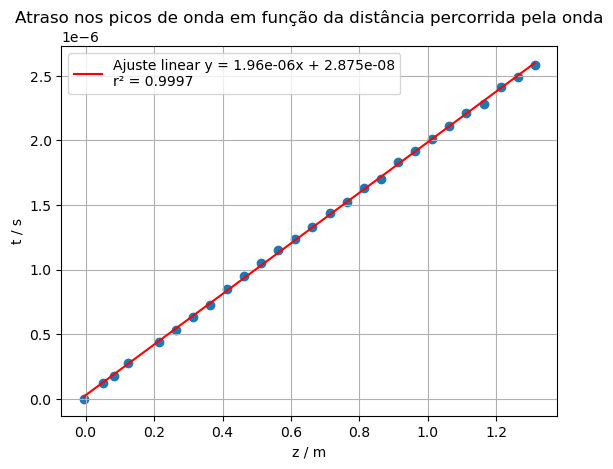

In [92]:
data_speed = pd.read_csv("lightspeed.csv", delimiter = "\t")

z = (151.3 - data_speed["L / cm"])/100 #medimos os valores na fita, mas o que queremos é a diferença entre z0 e z medido
dt = data_speed["atraso/mu s"] * 1e-6 # Em SI

params3, covari3 = dias(linreg, z, dt)
r23 = r2(dt, linreg(z, params3[0], params3[1]))

plt.scatter(z,dt)
plt.plot(z, linreg(z, params3[0], params3[1]), color = "r", 
         label = f"Ajuste linear y = {params3[0]:.2e}x + {params3[1]:.3e}\nr² = {r23:.4f}")
plt.title("Atraso nos picos de onda em função da distância percorrida pela onda")
plt.ylabel("t / s")
plt.xlabel("z / m")
plt.legend()
plt.grid()
plt.show()

In [102]:
f = 6e7 #fm
Tmr = 1/100000 #periodo da onda de f = fm-fr
v_c = f*Tmr/params3[0]
#inclui um erro de 1% em T e em f, pelo sim pelo não
u_c = np.sqrt( (np.sqrt(covari3[0,0])*3 * f*Tmr/params3[0]**2)**2 + (f/100*Tmr/params3[0])**2 + (f*Tmr/100/params3[0])**2) 
v_c, u_c

(np.float64(306598016.9251873), np.float64(5282684.067544917))

In [103]:
L_acri = 0.06
n_acri = 1 + v_c*(2.44-2.41)*1e-6 / (f*Tmr*L_acri)
n_acri

np.float64(1.2554983474376544)